<a href="https://colab.research.google.com/github/mrzaid/dl-cnn-bootcamp/blob/main/Working_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')


In [25]:
#!pip install resampy

In [26]:
import resampy

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
ANGRY_DATASET = '/content/drive/MyDrive/Complete Dataset/Angry Emotions'
MIX_DATASET = '/content/drive/MyDrive/Complete Dataset/Mix Emotions'

In [29]:
# Get the data location for ANGRY Emotion Audios
dir_list = os.listdir(ANGRY_DATASET)


# parse the filename to get the emotions
angry_emotion=[]
angry_path = []
for i in dir_list:
    if i[0]=='a':
        angry_emotion.append('angry')
    else:
        angry_emotion.append('unknown')
    angry_path.append(ANGRY_DATASET +'/'+ i)


# Now check out the label count distribution
ANGRY_EMOTIONS_df = pd.DataFrame(angry_emotion, columns = ['labels'])
ANGRY_EMOTIONS_df = pd.concat([ANGRY_EMOTIONS_df, pd.DataFrame(angry_path, columns = ['path'])], axis = 1)
print(ANGRY_EMOTIONS_df.shape)
ANGRY_EMOTIONS_df.head()


(500, 2)


,labels,path
0,angry,/content/drive/MyDrive/Complete Dataset/Angry ...
1,angry,/content/drive/MyDrive/Complete Dataset/Angry ...
2,angry,/content/drive/MyDrive/Complete Dataset/Angry ...
3,angry,/content/drive/MyDrive/Complete Dataset/Angry ...
4,angry,/content/drive/MyDrive/Complete Dataset/Angry ...


In [30]:
# Get the data location for MIX Emotion Audios
dir_list = os.listdir(MIX_DATASET)


# parse the filename to get the emotions
mix_emotion=[]
mix_path = []
for i in dir_list:
    if i[0]=='m':
        mix_emotion.append('mix')
    else:
        mix_emotion.append('unknown')
    mix_path.append(MIX_DATASET +'/'+ i)


# Now check out the label count distribution
MIX_EMOTIONS_df = pd.DataFrame(mix_emotion, columns = ['labels'])
MIX_EMOTIONS_df = pd.concat([MIX_EMOTIONS_df, pd.DataFrame(mix_path, columns = ['path'])], axis = 1)
print(MIX_EMOTIONS_df.shape)
MIX_EMOTIONS_df.head()

(500, 2)


,labels,path
0,mix,/content/drive/MyDrive/Complete Dataset/Mix Em...
1,mix,/content/drive/MyDrive/Complete Dataset/Mix Em...
2,mix,/content/drive/MyDrive/Complete Dataset/Mix Em...
3,mix,/content/drive/MyDrive/Complete Dataset/Mix Em...
4,mix,/content/drive/MyDrive/Complete Dataset/Mix Em...


In [31]:
#DATA AUGMENTATION
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor,)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data,rate=speed_factor,)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data,rate=speed_factor)

In [32]:
#sample_rate = 22050

def extract_features(data):
    result = np.array([])
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features1(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    return result

def get_features2(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.array(res2)
    return result

def get_features3(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.array(res3)
    return result

def get_features4(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.array(res4)
    return result

def get_features5(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.array(res5)
    return result


def get_features6(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.array(res6)
    return result

def get_features7(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #speed down
    lower_speed_data = lower_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.array(res7)
    return result

In [33]:
#!pip install resampy==0.2.2


In [34]:
#Feature Extraction for ANGRY Dataset
angryList =[]
angryLabels =[]
for index,row in ANGRY_EMOTIONS_df.iterrows():
    normal = get_features1(row['path'])
    noised = get_features2(row['path'])
    stretched = get_features3(row['path'])
    shifted = get_features4(row['path'])
    pitched = get_features5(row['path'])
    speed_up = get_features6(row['path'])
    speed_down = get_features7(row['path'])


    angryLabels.append(row['labels'])
    angryLabels.append(row['labels'])
    angryLabels.append(row['labels'])
    angryLabels.append(row['labels'])
    angryLabels.append(row['labels'])
    angryLabels.append(row['labels'])
    angryLabels.append(row['labels'])

    angryList.append(normal)
    angryList.append(noised)
    angryList.append(stretched)
    angryList.append(shifted)
    angryList.append(pitched)
    angryList.append(speed_up)
    angryList.append(speed_down)

print(angryList)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
angry_arr1 = np.array(angryList)
angry_arr1.shape

(3500, 58)

In [36]:
angry_arr2 = np.array(angryLabels)
angry_arr2.shape

(3500,)

In [37]:
columnss=[]
for i in range(58):
  columnss.append(i)
print(columnss)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [38]:
angry_df1 = pd.DataFrame(angry_arr1, columns = columnss)
angry_df2 = pd.DataFrame(angry_arr2, columns = ['labels'])


In [39]:
angry_df = pd.concat([angry_df1, angry_df2], axis=1)
print(f"Shape => {angry_df.shape}")
angry_df.head(10)


Shape => (3500, 59)


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-218.408279,89.609619,8.133126,1.580972,-17.737360,-11.099880,-12.118981,-24.430010,-8.057720,3.553795,...,-7.759345,-0.760463,1.189522,2.856884,1.696030,3.266346,3.770450,5.658118,0.262327,angry
1,-136.030924,46.708786,10.955061,-3.164763,-9.579086,-10.087949,-10.916374,-14.685176,-7.747941,-1.831722,...,-5.728474,-1.152177,1.696793,2.130389,2.903233,3.550999,3.760762,4.143966,2.293359,angry
2,-242.631882,85.266899,7.443476,1.622011,-18.424065,-11.341335,-12.473485,-25.206472,-8.635131,3.151859,...,-7.546924,-0.703264,1.238326,2.756898,1.744722,3.896428,3.928365,5.967909,0.325803,angry
3,-215.903366,90.461716,8.284443,1.946910,-17.344501,-10.807262,-11.909176,-24.114471,-7.688408,3.794328,...,-7.777023,-0.712511,1.166173,2.781938,1.642865,3.132529,3.791940,5.648445,0.264331,angry
4,-233.631577,82.928757,7.395226,-3.362676,-17.130716,-13.296722,-12.074818,-29.563566,-0.225474,-4.093743,...,5.471067,4.213591,3.849309,1.574458,4.505084,2.946588,3.856391,-0.525717,2.720252,angry
5,-229.113022,86.834755,6.887513,1.487601,-19.202034,-11.680208,-12.873122,-25.000948,-9.886301,3.792253,...,-8.102508,-0.225487,1.288153,2.608241,1.475512,3.473511,3.826583,5.700944,-0.537519,angry
6,-240.734085,85.888313,8.567566,2.588866,-17.664787,-11.524142,-13.247285,-25.589115,-9.155956,3.232950,...,-7.861843,-0.234687,1.496018,3.161862,1.826660,3.730582,4.320915,5.859002,0.117154,angry
7,-285.858459,77.239189,22.353344,3.882790,-8.543013,-11.135398,-12.202709,-11.710052,-7.487711,-0.457158,...,0.928688,-0.635874,-0.001097,-0.282897,1.373844,0.300289,-0.519457,1.305690,1.977837,angry
8,-109.982607,27.127776,11.035526,-0.022861,-3.503677,-7.824019,-9.733263,-9.332496,-6.807141,-3.022467,...,0.574358,1.060452,0.780849,0.234157,1.168330,0.937002,0.277934,1.138553,1.810622,angry
9,-320.114410,76.615532,22.640497,4.754137,-8.831723,-10.929656,-12.485476,-12.446303,-8.399677,-0.082940,...,0.935976,-0.337409,0.213128,-0.319760,1.413499,0.374216,-0.198627,1.442469,2.303997,angry


In [40]:
#Feature Extraction for MIX Dataset
mixList =[]
mixLabels =[]
for index,row in MIX_EMOTIONS_df.iterrows():
    normal = get_features1(row['path'])
    noised = get_features2(row['path'])
    stretched = get_features3(row['path'])
    shifted = get_features4(row['path'])
    pitched = get_features5(row['path'])
    speed_up = get_features6(row['path'])
    speed_down = get_features7(row['path'])


    mixLabels.append(row['labels'])
    mixLabels.append(row['labels'])
    mixLabels.append(row['labels'])
    mixLabels.append(row['labels'])
    mixLabels.append(row['labels'])
    mixLabels.append(row['labels'])
    mixLabels.append(row['labels'])

    mixList.append(normal)
    mixList.append(noised)
    mixList.append(stretched)
    mixList.append(shifted)
    mixList.append(pitched)
    mixList.append(speed_up)
    mixList.append(speed_down)

print(mixList)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
mix_arr1 = np.array(mixList)
mix_arr1.shape

(3500, 58)

In [42]:
mix_arr2 = np.array(mixLabels)
mix_arr2.shape

(3500,)

In [43]:
mix_df1 = pd.DataFrame(mix_arr1, columns = columnss)
mix_df2 = pd.DataFrame(mix_arr2, columns = ['labels'])


In [44]:
mix_df = pd.concat([mix_df1, mix_df2], axis=1)
print(f"Shape => {mix_df.shape}")
mix_df.head(10)


Shape => (3500, 59)


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-268.964172,88.563850,23.945496,3.226859,-20.652920,-5.739452,-5.119088,-18.069389,-7.547616,2.528581,...,-6.891440,-1.975196,-0.814174,2.330410,0.905303,1.270079,-0.489731,3.294400,-1.155483,mix
1,-85.339680,21.072613,9.509619,-1.632202,-4.728098,-5.117290,-5.569735,-5.696185,-4.174489,-2.672450,...,-2.985018,-1.857114,-0.553190,0.902319,1.939122,1.994861,0.953123,1.267355,0.858625,mix
2,-293.362366,84.062012,23.449665,2.568943,-22.378632,-7.345531,-6.001596,-19.031710,-8.145925,2.579014,...,-7.503695,-2.078730,-0.848314,2.328003,0.245972,1.165855,-0.296342,3.779377,-1.099319,mix
3,-267.462006,88.952316,23.987778,3.153672,-20.947386,-5.834735,-5.241616,-18.242081,-7.630676,2.571230,...,-6.799300,-1.834709,-0.806444,2.324965,0.939714,1.206893,-0.558805,3.304545,-1.045517,mix
4,-286.398712,83.304268,24.231792,-3.770085,-21.899042,-8.543906,-3.638446,-23.512203,-1.363738,-5.222819,...,3.724086,1.549605,4.303769,-1.397289,0.512799,-1.256078,2.586704,-1.359968,1.188532,mix
5,-280.754059,87.966438,21.318800,3.160159,-24.610958,-7.282392,-7.302340,-20.346470,-10.115443,2.792893,...,-6.775517,-1.122815,0.185403,2.580805,1.178834,1.833868,-0.363645,3.126567,-0.660244,mix
6,-294.035706,86.172417,22.420582,3.463526,-22.672367,-6.862576,-5.467881,-19.026430,-8.562423,2.212870,...,-6.928514,-1.536294,-0.371016,2.592239,0.255805,0.973183,-0.788198,3.342515,-1.041438,mix
7,-247.431793,89.571938,17.348265,6.263657,-18.046486,-3.189735,-4.423556,-15.923308,-8.607189,-1.306108,...,-5.088294,-0.031350,-4.003529,-3.190965,-4.481926,-0.531589,-0.967070,2.660663,1.909537,mix
8,-108.834886,30.342219,12.265962,-1.914460,-5.963599,-5.288530,-6.007252,-6.428766,-6.865488,-3.970180,...,-2.815724,-1.594064,-3.148848,-3.876427,-3.511411,-1.110577,0.293639,2.004567,3.559095,mix
9,-275.748596,86.357018,16.757778,7.399684,-18.575003,-3.725466,-5.845121,-16.566936,-9.755218,-1.136977,...,-5.273774,0.500285,-3.969536,-3.039028,-4.401725,-0.018044,-0.542891,2.660623,2.117988,mix


In [45]:
angry_df['labels'].unique()

array(['angry'], dtype=object)

In [46]:
mix_df['labels'].unique()

array(['mix'], dtype=object)

In [47]:
combined_df = pd.concat([angry_df, mix_df], ignore_index = True, sort = False)
combined_df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-218.408279,89.609619,8.133126,1.580972,-17.737360,-11.099880,-12.118981,-24.430010,-8.057720,3.553795,...,-7.759345,-0.760463,1.189522,2.856884,1.696030,3.266346,3.770450,5.658118,0.262327,angry
1,-136.030924,46.708786,10.955061,-3.164763,-9.579086,-10.087949,-10.916374,-14.685176,-7.747941,-1.831722,...,-5.728474,-1.152177,1.696793,2.130389,2.903233,3.550999,3.760762,4.143966,2.293359,angry
2,-242.631882,85.266899,7.443476,1.622011,-18.424065,-11.341335,-12.473485,-25.206472,-8.635131,3.151859,...,-7.546924,-0.703264,1.238326,2.756898,1.744722,3.896428,3.928365,5.967909,0.325803,angry
3,-215.903366,90.461716,8.284443,1.946910,-17.344501,-10.807262,-11.909176,-24.114471,-7.688408,3.794328,...,-7.777023,-0.712511,1.166173,2.781938,1.642865,3.132529,3.791940,5.648445,0.264331,angry
4,-233.631577,82.928757,7.395226,-3.362676,-17.130716,-13.296722,-12.074818,-29.563566,-0.225474,-4.093743,...,5.471067,4.213591,3.849309,1.574458,4.505084,2.946588,3.856391,-0.525717,2.720252,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-441.944611,112.935402,-19.858946,23.183905,-12.603999,1.267367,-4.776269,-9.695309,8.398093,-3.274715,...,0.030940,-2.526158,-5.422008,-3.624665,2.022164,0.290056,1.249321,2.775069,3.110826,mix
6996,-403.788147,110.921272,-15.269825,20.774874,-10.816345,1.913578,-3.436296,-7.871118,7.963537,-3.942189,...,-0.601585,-2.639119,-4.765911,-2.792643,1.794485,0.630285,1.523516,1.914916,2.091741,mix
6997,-430.183899,104.442825,-17.769402,20.855019,-13.495803,2.540602,-6.131321,-7.374632,9.368458,-7.384371,...,-5.615122,-2.988879,0.610555,5.001388,-0.048635,0.531167,1.591043,-0.805804,-1.230404,mix
6998,-430.836609,106.474854,-17.319883,22.115353,-13.190195,1.402933,-4.599054,-10.318637,7.260669,-2.994003,...,0.199268,-2.543006,-5.319841,-3.497963,1.908576,0.234726,1.187492,2.734885,3.225192,mix


In [48]:
combined_df.to_csv('features.csv', index=False)

In [49]:
Features = pd.read_csv('/content/features.csv')

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [51]:
Feature_X = Features.iloc[: ,:-1].values
Feature_Y = Features['labels'].values

In [52]:
print(f"Training Data Shape: {Feature_X.shape}")
print(f"Testing Data Shape:  {Feature_Y.shape}")

Training Data Shape: (7000, 58)
Testing Data Shape:  (7000,)


In [53]:
encoder = OneHotEncoder()
Feature_Y = encoder.fit_transform(np.array(Feature_Y).reshape(-1,1)).toarray()

In [54]:
x_train, x_test, y_train, y_test = train_test_split(Feature_X, Feature_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5600, 58), (5600, 2), (1400, 58), (1400, 2))

In [55]:
print(f"For mix_gender_X the shape is {x_train.shape}")
print(f"For mix_gender_Y the shape is {y_train.shape}")

For mix_gender_X the shape is (5600, 58)
For mix_gender_Y the shape is (5600, 2)


In [57]:
x_train

array([[-3.53515106e+02,  9.71903610e+01, -3.96013603e+01, ...,
        -3.22898889e+00, -3.23166013e+00,  1.48981184e-01],
       [-3.75763031e+02,  7.59997177e+01, -3.31735840e+01, ...,
         1.70067835e+00,  6.32327139e-01,  1.88985407e+00],
       [-1.66464493e+02,  8.92487793e+01, -3.65435982e+01, ...,
        -5.24865627e-01, -3.81613582e-01, -1.42888129e-01],
       ...,
       [-1.40702179e+02,  1.61846302e+01, -7.98859666e-01, ...,
         3.09655413e-01,  3.02715433e-01,  3.36780422e-01],
       [-2.68942841e+02,  6.68055115e+01, -6.72621536e+01, ...,
        -5.31145394e-01, -8.55701625e-01, -1.44690788e+00],
       [-1.96837753e+02,  1.03601013e+02, -4.01834450e+01, ...,
        -1.51944447e+00, -3.07461083e-01,  3.89750391e-01]])

In [58]:
y_train


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [56]:
x_train + y_train

ValueError: ignored

In [59]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
x_test

array([[ 1.87567789,  0.88204423, -1.21249118, ..., -1.32278686,
        -1.19314752, -0.25888562],
       [-0.17871799, -0.63628407,  0.04918269, ..., -0.25801538,
        -0.1700079 ,  0.11846948],
       [ 1.57968363,  1.2008479 , -0.88526955, ..., -0.64536291,
        -0.10436262, -1.82708122],
       ...,
       [ 0.16039802, -0.60796882, -0.73404415, ...,  0.0399653 ,
         0.28327252,  0.14198273],
       [ 0.33796936, -0.41595251,  0.52018658, ..., -1.92443629,
         0.63386217,  0.34443852],
       [-0.98810424,  1.51015014, -0.2637127 , ...,  1.3512716 ,
        -1.25177131,  0.85674075]])

In [61]:
# Making our data compatible to model
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((5600, 58, 1), (5600, 2), (1400, 58, 1), (1400, 2))

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [63]:

# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [64]:

with strategy.scope():

    def build_model(in_shape):

        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=2, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


        return model


In [65]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()

    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]

    return model

In [66]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)
batch_size = 32
n_epochs = 75

In [67]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(15,10)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].labelsize = 15
    ax[0].titlesize = 18

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].labelsize = 15
    ax[1].titlesize = 18
    plt.show()

In [68]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Averag  (None, 8, 128)           0

In [69]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
175/175 [==============================] - 7s 12ms/step - loss: 0.4521 - accuracy: 0.7905 - val_loss: 0.3820 - val_accuracy: 0.8129 - lr: 0.0010
Epoch 2/75
175/175 [==============================] - 2s 12ms/step - loss: 0.3057 - accuracy: 0.8666 - val_loss: 0.2399 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 3/75
175/175 [==============================] - 2s 11ms/step - loss: 0.2404 - accuracy: 0.8970 - val_loss: 0.1864 - val_accuracy: 0.9329 - lr: 0.0010
Epoch 4/75
175/175 [==============================] - 1s 8ms/step - loss: 0.1806 - accuracy: 0.9252 - val_loss: 0.1614 - val_accuracy: 0.9264 - lr: 0.0010
Epoch 5/75
175/175 [==============================] - 1s 6ms/step - loss: 0.1502 - accuracy: 0.9354 - val_loss: 0.1226 - val_accuracy: 0.9507 - lr: 0.0010
Epoch 6/75
175/175 [==============================] - 2s 9ms/step - loss: 0.1150 - accuracy: 0.9554 - val_loss: 0.1129 - val_accuracy: 0.9593 - lr: 0.0010
Epoch 7/75
175/175 [==============================] - 2s 9ms/step -

In [70]:
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 100.00%
Mixed-gender emotions testing Accuracy: 98.93%


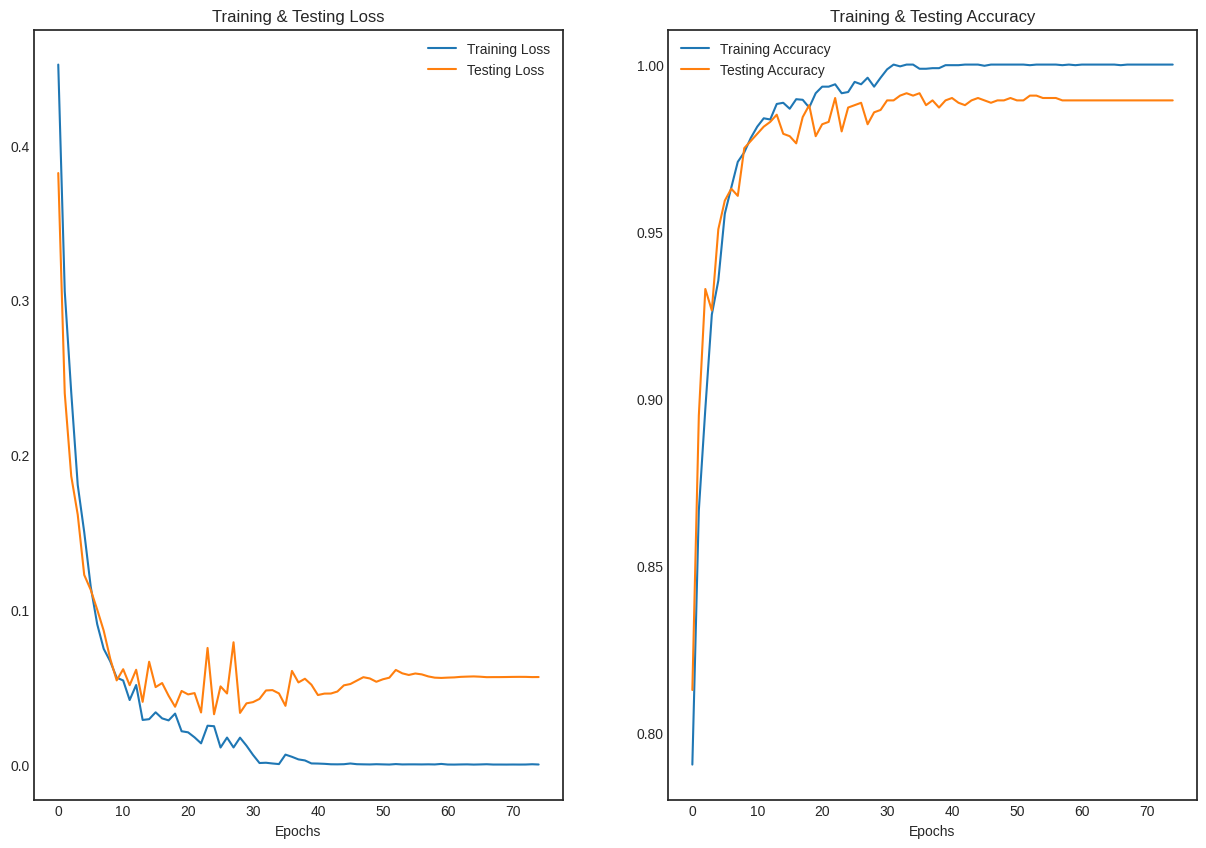

In [71]:
show_graphs(history)

In [72]:
# predicting on test data.
pred_test = total_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)

44/44 [==============================] - 0s 2ms/step


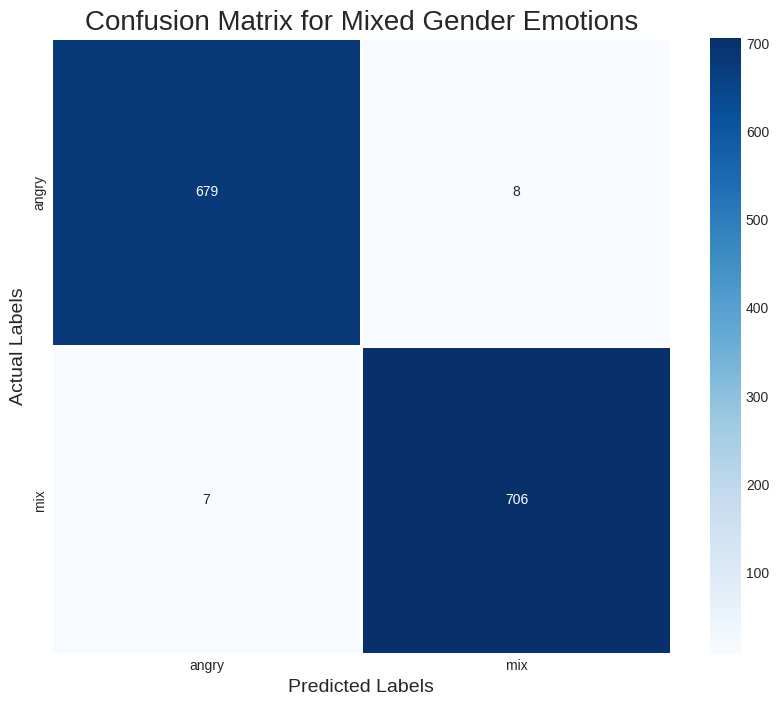

In [73]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (10, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Mixed Gender Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


In [75]:
def getPieChart(y_pred):
    a=[]
    for i in y_pred:
        a.append(i[0])
    # print(a)
    b=np.array(a)
    x= np.unique(b)
    count=[]
    for ii in x:
        c=a.count(ii)
        count.append(c)
    # print(count)
    cars = x

    data = count
    import seaborn as sns
    colors = sns.color_palette('Paired')[0:5]

    plt.pie(data, labels = x,autopct='%1.1f%%',colors=colors)
    plt.show()

In [ ]:
#sample_rate = 22050

def extract_features(data):
    result = np.array([])
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))

    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))

    return result

In [ ]:
#Testing Method 01
path_m = '/content/angry test (1).wav'
Audio(path_m)

In [ ]:
path_m = '/content/angry test (1).wav'
x = get_features(path_m)
x = scaler.transform(x)
x = np.expand_dims(x, axis=2)

pred_test = total_model.predict(x)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)


emotion='Test'
data, sampling_rate = librosa.load(path_m)
# create_waveplot(data, sampling_rate, emotion)
getPieChart(y_pred)

In [ ]:
# path_m = '/content/angry test (1).wav'
# data, sample_rate = librosa.load(path_m, duration=3, offset=0.5, res_type='kaiser_fast')
# result = np.array([])
# mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
# mfccs_processed = np.mean(mfccs.T,axis=0)
# result = np.array(mfccs_processed)
# xx =  np.reshape(result, (1,58))
# # x
# x = scaler.transform(xx)
# x = np.expand_dims(xx, axis=2)

# pred_test = total_model.predict(x)
# y_pred = encoder.inverse_transform(pred_test)
# y_test_ = encoder.inverse_transform(y_test)
# y_test_


# emotion='Test'
# data, sampling_rate = librosa.load(path_m)
# # create_waveplot(data, sampling_rate, emotion)
# getPieChart(y_pred)

In [ ]:
path_m = '/content/drive/MyDrive/shehroz dataset/angry/a_103.wav'
Audio(path_m)

In [ ]:
#Alternate Method
normal = get_features1(path_m)
noised = get_features2(path_m)
stretched = get_features3(path_m)
shifted = get_features4(path_m)
pitched = get_features5(path_m)
speed_up = get_features6(path_m)
speed_down = get_features7(path_m)

result = np.array(normal)
result = np.vstack((result, noised))
result = np.vstack((result, stretched))
result = np.vstack((result, shifted))
result = np.vstack((result, pitched))
result = np.vstack((result, speed_up))
result = np.vstack((result, speed_down))

In [ ]:
# x = get_features(path_m)
x = scaler.transform(result)
x = np.expand_dims(x, axis=2)

pred_test = total_model.predict(x)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_test)


emotion='Test'
data, sampling_rate = librosa.load(path_m)
# create_waveplot(data, sampling_rate, emotion)
getPieChart(y_pred)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import joblib
# saving and loading the .h5 model

# save model
total_model.save('gfgModel.h5')
print('Model Saved!')

joblib.dump(scaler, 'std_scaler.bin', compress=True)
# load model
savedModel=load_model('gfgModel.h5')
savedModel.summary()

In [ ]:
# save model
total_model.save_weights('gfgModelWeights')
print('Model Saved!')

# load model
savedModel = total_model.load_weights('gfgModelWeights')
print('Model Loaded!')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('gfgModel.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
type(x_train)